# Week 3 Class 2 - Exploratory Data Analysis with the Kaggle TMDb Dataset

## Table of Contents<a id="Top"></a>

1. [Install Packages](#1)
2. [Load File and View Details about Columns and Rows](#2)<br>
3. [Descriptive Exploratory Analysis](#3)<br>
    3.1. [Extract certain rows and columns](#3.1)<br>
    3.2. [Quick look at Dictionaries](#3.2)<br>
    3.3. [View Summary Statistics](#3.3)<br>
4. [Visualizing distributions of numeric columns](#4)<br>
5. [Visualizing relationships between numeric columns](#5)<br>
6. [Visualizing non-numeric columns](#6)<br>

The Movie Database source file came from:  https://www.kaggle.com/tmdb/tmdb-movie-metadata/

# 1. Install Packages<a id=1></a>

Let's import pandas as pd, and seaborn as sns. These are the standard import names to reference in python. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##### [Back to Top](#Top)

# 2. Load File and View Details about Columns and Rows<a id=2></a>

Make sure you have the file tmdb_5000_movies.csv in the same place as this notebook file. Then read the csv file named `tmdb_5000_movies.csv` into a pandas dataframe called `df`.

In [3]:
df = pd.read_csv("/Users/Ryan/teaching/winter-2022/info-3440/in-class-material/week-03/Class-Two/tmdb_5000_movies.csv")

What are the dimensions (shape) of the dataframe?

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.shape

(4803, 20)

In [6]:
print('There are', df.shape[0], 'rows and', df.shape[1], 'columns')

There are 4803 rows and 20 columns


View the column types of the data frame.

In [7]:
df.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

Display the first 7 rows of the dataframe with the `head()` function.

In [9]:
df.head(7)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330


What are the names of the columns in the dataframe?

In [10]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

Note we can see the labeling here of **Index** around the output because the column names are of type **Index**. In order to make the output look a little cleaner, use the list function, `list()`.

In [11]:
list(df.columns)

['budget',
 'genres',
 'homepage',
 'id',
 'keywords',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'vote_average',
 'vote_count']

The `print()` method is useful for showing lists as well. 

In [12]:
print(list(df.columns))

['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'vote_average', 'vote_count']


##### [Back to Top](#Top)

# 3. Descriptive Exploratory Analysis<a id=3></a>

## 3.1 Extract certain rows and columns<a id=3.1></a>

View the first row of data, indexed by 0. Python is a zero-indexed language! We can do this with the `head()` function, but also we can do it with the *.loc* method associdate with *pd* objects. This allows us to specify certain rows and columns with the syntax `.loc[row,column]`.  Note since we started with a pandas dataframe, if we extract only 1 row, it returns a pandas Series. The column name is now the Name of the Series which represented row/index 0.

In [13]:
df.loc[0]

budget                                                          237000000
genres                  [{"id": 28, "name": "Action"}, {"id": 12, "nam...
homepage                                      http://www.avatarmovie.com/
id                                                                  19995
keywords                [{"id": 1463, "name": "culture clash"}, {"id":...
original_language                                                      en
original_title                                                     Avatar
overview                In the 22nd century, a paraplegic Marine is di...
popularity                                                     150.437577
production_companies    [{"name": "Ingenious Film Partners", "id": 289...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2009-12-10
revenue                                                        2787965087
runtime                               

In [15]:
df.loc[1]

budget                                                          300000000
genres                  [{"id": 12, "name": "Adventure"}, {"id": 14, "...
homepage                     http://disney.go.com/disneypictures/pirates/
id                                                                    285
keywords                [{"id": 270, "name": "ocean"}, {"id": 726, "na...
original_language                                                      en
original_title                   Pirates of the Caribbean: At World's End
overview                Captain Barbossa, long believed to be dead, ha...
popularity                                                     139.082615
production_companies    [{"name": "Walt Disney Pictures", "id": 2}, {"...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2007-05-19
revenue                                                         961000000
runtime                               

View the the first row of the column "id". Remember since **Python starts indexing at 0, not 1**, the first row is index 0. Note the output is just a value.

In [17]:
df.loc[0, 'title']

'Avatar'

View the third and fourth rows of the column "id". 

In [19]:
df.title.loc[0]

'Avatar'

In [21]:
df.loc[2:3, 'id']

2    206647
3     49026
Name: id, dtype: int64

View the third and fourth rows of the columns "id" and "homepage". Note since we extract two columns, it returns a pandas dataframe.

In [21]:
df.loc[2:3, ['id','homepage']]

,id,homepage
2,206647,http://www.sonypictures.com/movies/spectre/
3,49026,http://www.thedarkknightrises.com/


In [23]:
df.loc[2:3, ['id', 'homepage']]

,id,homepage
2,206647,http://www.sonypictures.com/movies/spectre/
3,49026,http://www.thedarkknightrises.com/


What movies are in this data frame? 

In [25]:
df.loc[:, 'title']

0                                         Avatar
1       Pirates of the Caribbean: At World's End
2                                        Spectre
3                          The Dark Knight Rises
4                                    John Carter
                          ...                   
4798                                 El Mariachi
4799                                   Newlyweds
4800                   Signed, Sealed, Delivered
4801                            Shanghai Calling
4802                           My Date with Drew
Name: title, Length: 4803, dtype: object

Find only the rows for the title "Pulp Fiction".

In [29]:
#df.title == 'Avatar' 
type(df[df.title == 'Pulp Fiction'])

pandas.core.frame.DataFrame

Find only the rows for the title "Avatar" and return only the "runtime" and "vote_average" columns.

In [30]:
df.loc[df.title == 'Pulp Fiction', ['runtime', 'vote_average', 'title']]

,runtime,vote_average,title
3232,154.0,8.3,Pulp Fiction


##### [Back to Top](#Top)

## 3.2 Quick look at Dictionaries<a id=3.2></a>

This dataframe also has some columns with a complex data structure with **key-value** pairs. Let's explore this a little bit. View the first row of the column "genres".

In [31]:
df.loc[0, 'genres']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

What is the type of this output? It is a list of Dictionaries. This Dictionary structure is an important part of working with Python. You will explore more in the DataCamp Dictionaries and Pandas. On closer inspection, however, we notice that it's actually a string. You'll notice the single parens at the beginning and end. 

In [33]:
df.loc[0, 'genres']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

You might think we could use a function like `list()` to convert it (try it - it makes a list of every single character in the string) - but that is not going to work, but there is an `eval()` command that allows us to evaluate a string as python code. Note the output after we run `eval()`. See how the structure changes away from a string. Now we have a list of dictionaries.

In [32]:
eval(df.loc[0, 'genres'])

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

Let's look at the first value from the list.

In [36]:
genres = eval(df.loc[0, 'genres'])
genres[0]

{'id': 28, 'name': 'Action'}

Let's just take a look at 2 things we can do with Dictionaries.
First, pull out the **keys**.

In [38]:
type(genres[0])

dict

In [40]:
genres[0].values()

dict_values([28, 'Action'])

Second, pull the value from the 'id' key.

In [38]:
genres[0]['id']

28

As mentioned above, the key-value idea (or dictionary in python parlance) is extremely valuable data structure. It might take us a bit of time to get up to speed, but we'll get used to them rather quickly. 

##### [Back to Top](#Top)

## 3.3 View Summary Statistics<a id=3.3></a>

### Using the built-in `describe()` method

Use the dataframe's `describe()` method to quickly summarize statistics of the numeric columns.  Store the result of calling this method in a new variable called `desc`. Note that it will automatically only evaluate columns that are numeric.  

In [41]:
desc = df.describe()
desc

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


How many numeric columns do we have in the original dataframe? Note that 

In [42]:
print('There are', desc.shape[1], 'columns that are numeric.')

There are 7 columns that are numeric.


Does the mean or standard deviation "make sense" for every column in `desc`?  (Use common sense and your best judgement in interpreting what the columns represent. Since id is numeric (integer type) it will be included in our output but probably not useful to find the mean or standard deviation of id.)

Change the column type of id to be a string. You can also make it an object. The result will be the same in the pandas dataframe.

In [43]:
df.id = df.id.astype(str)

In [44]:
df.dtypes

budget                    int64
genres                   object
homepage                 object
id                       object
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [45]:
desc = df.describe()
desc

,budget,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


Find the mean of the **budget** column with the `.mean()` method. Note that Python has methods for most common summary statistics such as `.mean()`, `.std()`, `.median()`, `.corr()`, `.max()`, and `.min()`.

In [46]:
df.budget.median()

15000000.0

Find the mean for two columns - **runtime** and **popularity**.

In [47]:
df[['runtime','popularity']].mean()

runtime       106.875859
popularity     21.492301
dtype: float64

Find the mean and standard deviation of runtime and store it in a pandas dataframe. Here are 3 ways to show these numbers at the same time.

In [48]:
print('The runtime mean is', df.runtime.mean(), 'and the standard deviation is', round(df.runtime.std(),2))

The runtime mean is 106.87585919600083 and the standard deviation is 22.61


Note that another pandas data structure is called a Series. These things can be super useful when dealing with dicts. 

In [49]:
ser = {'Mean':df.runtime.mean(), 'StdDev':df.runtime.std()}
pd.Series(ser, name='runtime')

Mean      106.875859
StdDev     22.611935
Name: runtime, dtype: float64

In [50]:
#pandas DataFrame converted from Series
pd.DataFrame(pd.Series(ser, name='runtime'))

,runtime
Mean,106.875859
StdDev,22.611935


##### [Back to Top](#Top)

# 4. Visualizing distributions of numeric columns<a id=4></a>

The simplest way to visualize a distribution of values is using a histogram.  

Create a histogram of the "budget" column.  

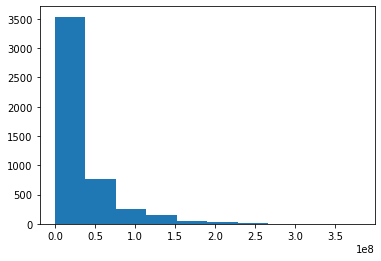

In [52]:
plt.hist(df.budget)
plt.show()

Let's make the chart pretty. This code works for most python plots. The `plt.figure(figsize=(8,5))` indicates a specific  width and height. As a reference, the defaults are (6.4, 4.8).

Note that you can use the `.title()`, `.xlabel()`, and `ylabel()` methods to add nice titles and labels.

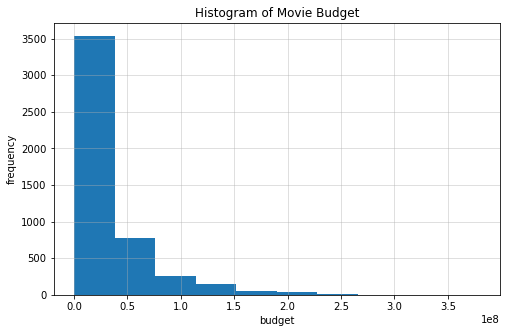

In [53]:
plt.figure(figsize=(8,5))
plt.hist(df.budget)
plt.title('Histogram of Movie Budget')
plt.xlabel('budget')
plt.ylabel('frequency')
plt.grid(alpha = .5)
plt.show()

Use the `help` information about `df.hist` to figure out how to use 20 bins instead of the default.

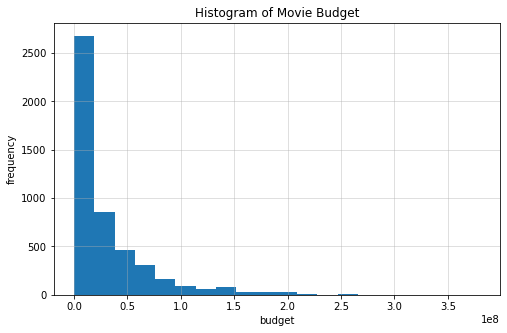

In [54]:
plt.figure(figsize=(8,5))
plt.hist(df.budget, bins = 20)
plt.title('Histogram of Movie Budget')
plt.xlabel('budget')
plt.ylabel('frequency')
plt.grid(alpha = .5)
plt.show()

What about a density plot?

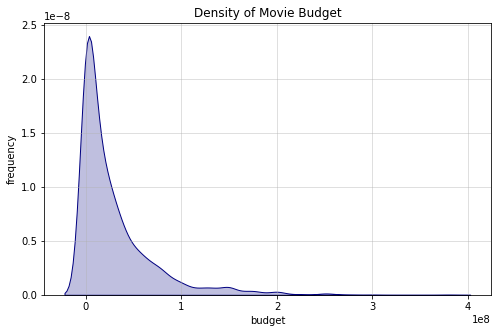

In [55]:
plt.figure(figsize=(8,5))
sns.kdeplot(df.budget, color = "navy", fill = True)
plt.title('Density of Movie Budget')
plt.xlabel('budget')
plt.ylabel('frequency')
plt.grid(alpha = .5)
plt.show()

##### [Back to Top](#Top)

## 5. Visualizing relationships between numeric columns<a id=5></a>
One of the first questions that pops to mind is about correlations between numeric variables.  "Are movies with the highest budget also the most popular?  Most profitable? Etc..."

One of the simplest things we can do is to calculate correlations between variables using the built-in `corr()` method.

In [58]:
df.corr()

,budget,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,0.505414,0.730823,0.269851,0.093146,0.593180
popularity,0.505414,1.000000,0.644724,0.225502,0.273952,0.778130
revenue,0.730823,0.644724,1.000000,0.251093,0.197150,0.781487
runtime,0.269851,0.225502,0.251093,1.000000,0.375046,0.271944
vote_average,0.093146,0.273952,0.197150,0.375046,1.000000,0.312997
vote_count,0.593180,0.778130,0.781487,0.271944,0.312997,1.000000


Identify a pair of highly correlated variables and create a scatter plot showing their relationship.

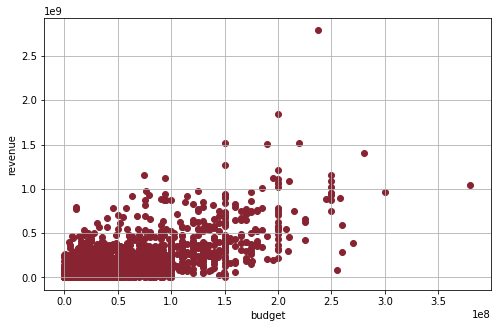

In [60]:
plt.figure(figsize=(8,5))
plt.scatter(x = df.budget, y = df.revenue, color = "#882332")
plt.grid()
plt.xlabel("budget")
plt.ylabel("revenue")
plt.show()

You can use the `alpha` optional argument to plot to change marker transparency.  `alpha` must be between 0 (perfectly transparent) to 1 (perfectly opaque).

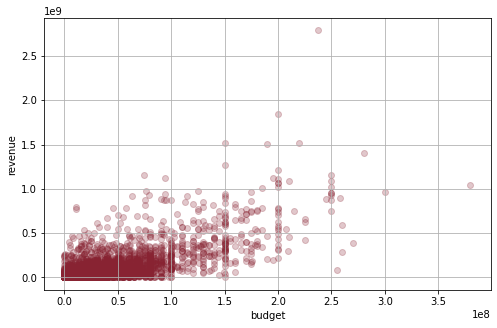

In [61]:
plt.figure(figsize=(8,5))
plt.scatter(x = df.budget, y = df.revenue, alpha = .25, color = "#882332")
plt.grid()
plt.xlabel("budget")
plt.ylabel("revenue")
plt.show()

Now do the same thing for two uncorrelated variables.  What pattern do you expect to see in the scatter chart?

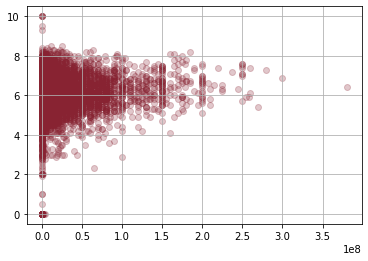

In [103]:
plt.scatter(x = df.budget, y = df.vote_average, alpha = .25, color = '#882332')
plt.grid()
plt.show()

## 6. Visualizing non-numeric columns<a id=6></a>

Let's make a bar plot to show the frequency of the `original_language` variable.

In [62]:
df.original_language.nunique()

37

View the list of unique values. We can use the `.unique()` method for this.

In [108]:
print(list(df.original_language.unique()))

['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn', 'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is', 'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa', 'no', 'sl', 'ps', 'el']


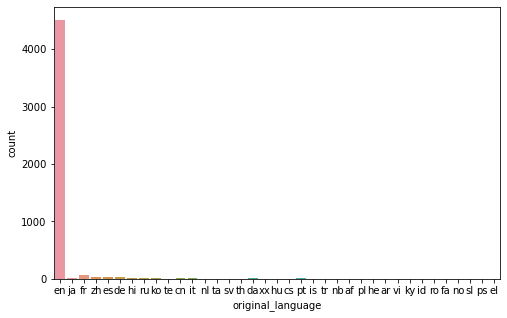

In [63]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'original_language', data = df)
plt.show()

Let's leave out english to get a better view of the other frequencies. Note we just rows from the second row (Index 1) on **1:**.

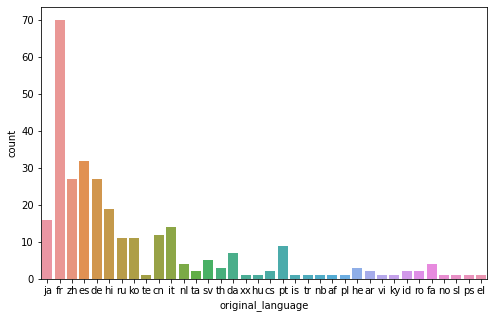

In [64]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'original_language', data = df[df.original_language != 'en'])
plt.show()

Can we sort this? 

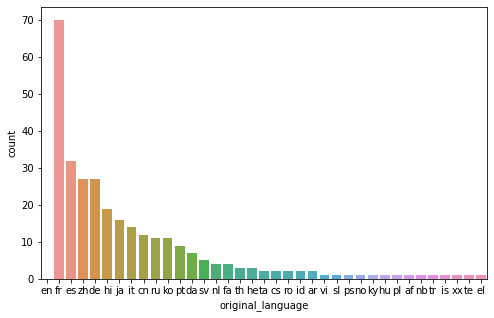

In [66]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'original_language',
              data = df[df.original_language != 'en'],
              order = df.original_language.value_counts().index,
              fill = True)
plt.show()